In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.somlib as som
%matplotlib inline

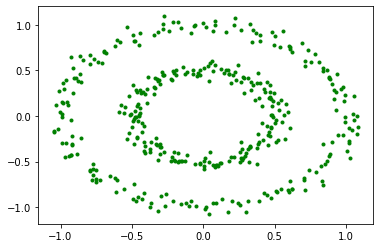

In [2]:
from sklearn.datasets import make_circles
# xy, clas = make_circles(n_samples=400, shuffle=True, noise=0.05, random_state=None, factor=0.9)
xy, clas = make_circles(n_samples=400, shuffle=True, noise=0.05, random_state=None, factor=0.5)
x = xy[:,0]
y = xy[:,1]
plt.scatter(x, y, marker='.', color='g')

## Continuous Visualization

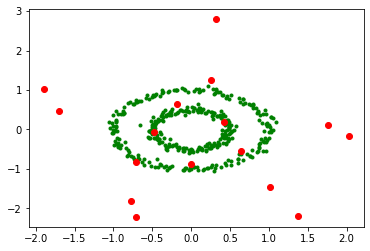

In [3]:
mysom = som.SOM2D(2, (4,4), learning_rate=1, sigma=0.5, decay_rate=0.9999999)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')

In [4]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

EPOCHS = 5
for epoch in range(EPOCHS):
    print('EPOCHS', epoch)
    print(f'lr={mysom.learning_rate}, sigma={mysom.sigma}')
    sample_indx = np.random.permutation(len(xy))
    for i, indx in enumerate(sample_indx):
        mysom._calculate_vector_distance_(xy[indx])
        mysom._calculate_neighbourhood_influence_()
        mysom._calculate_gradients_()
        mysom._update_()
        
        if i%20 ==0:
            ax.clear()
            plt.scatter(x, y, marker='.', color='g')
            plt.scatter(mysom.weights[0], mysom.weights[1], color='r')
            fig.canvas.draw()
            plt.pause(0.001)
        
    mysom._decay_()
plt.close()

EPOCHS 0
lr=1, sigma=0.5
EPOCHS 1
lr=0.5000000250000012, sigma=0.2500000125000006
EPOCHS 2
lr=0.16666668611111277, sigma=0.08333334305555638
EPOCHS 3
lr=0.04166667465277879, sigma=0.020833337326389395
EPOCHS 4
lr=0.008333335597222605, sigma=0.004166667798611303


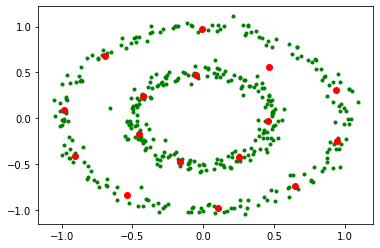

In [5]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')

In [6]:
mysom.weights.shape

(2, 4, 4)

### visualize cluster

In [7]:
_x = np.linspace(-1.1, 1.1, 100)
_y = np.linspace(-1.1, 1.1, 100)
_x, _y = np.meshgrid(_x,_y)
_x = _x.reshape(-1)
_y = _y.reshape(-1)
_xy = np.stack([_x, _y], axis=1)

In [8]:
x.shape, y.shape, xy.shape

((400,), (400,), (400, 2))

In [9]:
_x.shape, _y.shape, _xy.shape

((10000,), (10000,), (10000, 2))

In [10]:
winners = []
for i in range(len(_xy)):
    dists, winning = mysom._calculate_vector_distance_(_xy[i])
    indx = winning[0]+4*winning[1]
    winners.append(indx)
winners = np.array(winners)

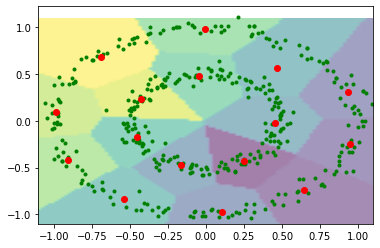

In [11]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')
plt.imshow(winners.reshape(100, 100),
           interpolation='bilinear',
           extent=(_x.min(), _x.max(), _y.min(), _y.max()),
#            cmap='tab20',#matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

### Equivalence to K-Means

In [16]:
from sklearn.cluster import KMeans

In [17]:
mykmeans = KMeans(n_clusters=4*4)

In [18]:
yout = mykmeans.fit_predict(xy)

In [20]:
_yout = mykmeans.predict(_xy)

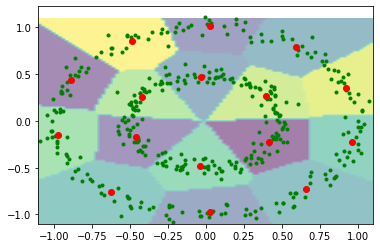

In [24]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mykmeans.cluster_centers_[:,0], mykmeans.cluster_centers_[:,1], color='r')
plt.imshow(_yout.reshape(100, 100),
           interpolation='bilinear',
           extent=(_x.min(), _x.max(), _y.min(), _y.max()),
#            cmap='tab20',#matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

In [23]:
mykmeans.cluster_centers_.T

array([[ 0.41328874, -0.88853107, -0.45913817,  0.029336  ,  0.03014781,
        -0.03322151,  0.59240271,  0.66006784, -0.62101684,  0.95888269,
        -0.03762193, -0.97173414, -0.42284222,  0.3920882 ,  0.92258959,
        -0.48755146],
       [-0.22879986,  0.43905   , -0.17485093,  1.01096563, -0.97731002,
         0.47286796,  0.78852656, -0.73292421, -0.76458464, -0.22549995,
        -0.48017286, -0.15307828,  0.257209  ,  0.26788905,  0.35682322,
         0.8507081 ]])